In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from tqdm.notebook import *
import tdpkefm

from tdpkefm import *
import glob
import json_tricks
import copy

mpl.rc('font', size=8)

In [3]:
d = json_tricks.load("results/S4-data.json.gz", conv_str_byte=True)

# Sort by Vt(t = t0)
d = sorted(d, key=lambda x: x['V0_frac'])

# Plot Fig. S4

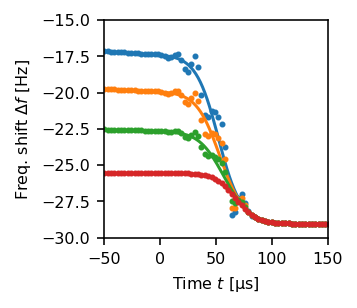

In [4]:
dec = 2
plt.figure(figsize=(2,2))
colors= []
for ds in d:
    df_sim_2 = np.convolve(ds['val']['df']*1e6/(2*np.pi), np.ones(16)/16)
    df_python_filt = np.convolve(ds['val']['df_python'], np.ones(16)/16.0, 'valid',)
    df_python_filt2 = np.convolve(df_python_filt, np.ones(16)/16.0, 'full')
    
    lines = plt.plot(ds['val']['t'][::3], df_sim_2[::3], '.', markersize=4, label="$V_t(t_0) = ${} V".format(ds['V0_frac']*10))[0]
    plt.plot(ds['val']['t'][15:], df_python_filt2, '-', color=lines.get_color(),
             linewidth=1.5)
    
    colors.append(lines.get_color())

plt.xlim(-50, 150)
plt.ylim(-30, -15)
plt.xlabel("Time $t$ [μs]")
plt.ylabel("Freq. shift $\Delta f$ [Hz]")


# plt.legend()
plt.savefig('figs/S4a.pdf', bbox_inches='tight')

[-17.41419447]
[-19.96131767]
[-22.68223594]
[-25.57694756]


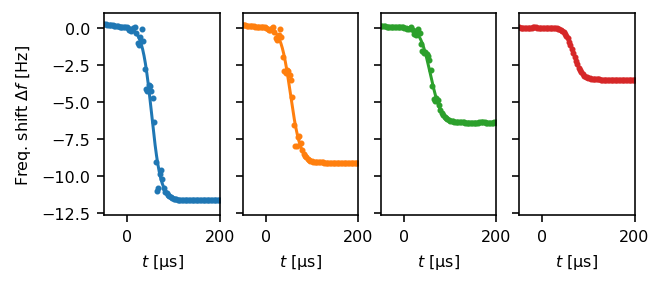

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=4, sharey=True,
                         sharex=True, figsize=(4.75, 1.85))
for (ds, ax, color) in zip(d, axes, colors):
    teq0 = ds['val']['t'][15:]==0
    df_python_filt = np.convolve(ds['val']['df_python'], np.ones(16)/16.0, 'valid',)
    df_python_filt2 = np.convolve(df_python_filt, np.ones(16)/16.0, 'full')
    df0 = df_python_filt2[teq0]
    print(df0)
    df_sim_2 = np.convolve(ds['val']['df']*1e6/(2*np.pi), np.ones(16)/16)
    
    lines = ax.plot(ds['val']['t'][::3], df_sim_2[::3] - df0, '.', markersize=4, color=color)[0]
    ax.plot(ds['val']['t'][15:], df_python_filt2-df0, '-', color=lines.get_color(),
             linewidth=1.5, label="$V_t(t_0) = ${} V".format(ds['V0_frac']*10))
    
    ax.set_xlabel("$t$ [μs]")
    
ax.set_xlim(-50, 200)
ax.set_ylim(-12.6, 1)
axes[0].set_ylabel("Freq. shift $\Delta f$ [Hz]")

fig.savefig('figs/S4b-e_squeezed-same.pdf', bbox_inches='tight', transparent=True)

## Print Experimental Parameters

In [6]:
{key: val for key, val in d[0].items() if key != 'val'}

{'tau': 10,
 'Rlight': 10000.0,
 'Rdark': 10000000.0,
 'V0_frac': 0.7,
 'phase': 0,
 'Cs': 5e-05}

In [7]:
{key: val for key, val in d[0]['val']['sim'].items()}

{'omega0': 0.39269908169872414,
 'k0': 3.5,
 'Q': 26000.0,
 'C': 0.0001,
 'Cz': -2.8e-05,
 'Czz': 6.774193548387096e-05,
 'DCzz': 1.568e-05,
 'Czz_q': 5.2061935483870965e-05,
 'Cs': 5e-05}